<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/Prophet_Base_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Case for Prophet data on New York City

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn import preprocessing

## Load Data

In [3]:
NY_labeledData_Aug23 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_labeledData_Aug23.csv',low_memory=False)
print(NY_labeledData_Aug23.shape)

(9690, 18)


In [4]:
NY_labeledData_Aug23 = NY_labeledData_Aug23.astype({'label': 'string'})

In [5]:
NY_labeledData_Aug23 = NY_labeledData_Aug23.dropna()

In [6]:
NY_labeledData_Aug23['label'] = preprocessing.LabelEncoder().fit_transform(NY_labeledData_Aug23['label'])

In [7]:
NY_labeledData_Aug23.rename(columns={'Date': 'ds', 'label': 'y'}, inplace=True)

In [8]:
NY_labeledData_Aug23.dtypes

ds                        object
fips_x                     int64
County Name               object
retail and recreation    float64
grocery and pharmacy     float64
parks                    float64
transit stations         float64
workplaces               float64
residential              float64
driving                  float64
m50                      float64
m50_index                  int64
population_density       float64
mask_rule_active           int64
mask_wearing_percent     float64
New cases                  int64
rolling_avg_new_cases    float64
y                          int64
dtype: object

In [9]:
NY_labeledData_Aug23.head()

,ds,fips_x,County Name,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,rolling_avg_new_cases,y
0,2020-03-01,36001,Albany County,10.0,13.0,19.0,4.0,7.0,-1.0,-4.87,2.616,54,584.364958,0,0.0,0,0.0,0
1,2020-03-01,36003,Allegany County,47.0,13.0,0.0,0.0,1.0,0.0,19.81,0.707,12,44.778541,0,0.0,0,0.0,0
2,2020-03-01,36123,Yates County,31.0,33.0,0.0,0.0,7.0,0.0,28.14,5.004,72,73.676584,0,0.0,0,0.0,0
3,2020-03-01,36119,Westchester County,8.0,-1.0,12.0,1.0,0.0,0.0,-4.34,3.903,59,2247.400697,0,0.0,0,0.0,0
4,2020-03-01,36031,Essex County,16.0,11.0,17.0,0.0,1.0,0.0,60.18,12.600,197,20.557565,0,0.0,0,0.0,0


In [10]:
NY_labeledData_Aug26 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/NY_sd_inertia_labeledData_Aug26.csv',low_memory=False)
print(NY_labeledData_Aug26.shape)

(12296, 55)


In [11]:
NY_labeledData_Aug26.head()

,Date,Province_State,FIPS,New cases,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Confirmed,Deaths,New deaths,#days: decreasing ILI cases,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,Imported COVID cases,rolling_avg_new_cases,label
0,2020-01-22,New York,36001,0,0,36001,Albany County,36,20,21,4.32,40.3,2.3,35.4,1.06,3.25,0,307117,0.4,2020-01-22,6.06,22,64535,11.7,5.8,48.44,577,465,151,2.74,0.22,0.029,37.0,27,0.0,0.8,3.7,4.2,0.7,63.5,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread
1,2020-01-22,New York,36043,0,0,36043,Herkimer County,36,16,20,4.29,35.2,0.4,47.9,1.04,3.25,0,61833,-0.7,2020-01-22,1.04,27,51862,1.1,2.1,49.46,43,12,106,2.74,0.22,0.029,37.0,67,0.0,0.8,3.7,4.2,0.7,63.5,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread
2,2020-01-22,New York,36041,0,0,36041,Hamilton County,36,13,16,4.31,37.6,1.6,67.0,0.28,4.03,0,4434,7.0,2020-01-22,0.37,36,57552,0.8,1.6,51.30,3,1,249,2.74,0.22,0.029,37.0,96,0.0,0.8,3.7,4.2,0.7,63.5,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread
3,2020-01-22,New York,36111,0,0,36111,Ulster County,36,17,21,4.29,29.4,1.9,45.6,0.92,3.38,0,178599,5.7,2020-01-22,2.47,26,63348,5.4,10.0,49.51,154,86,144,2.74,0.22,0.029,37.0,59,0.0,0.8,3.7,4.2,0.7,63.5,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread
4,2020-01-22,New York,36039,0,0,36039,Greene County,36,15,17,4.22,38.9,2.3,53.0,0.92,3.30,0,47491,-4.0,2020-01-22,1.13,29,53617,5.8,5.8,52.30,72,24,135,2.74,0.22,0.029,37.0,78,0.0,0.8,3.7,4.2,0.7,63.5,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LessSpread


## Prophet Model Implementation for August 23rd

In [12]:
prophet_model = Prophet()

In [13]:
prophet_model.fit(NY_labeledData_Aug23)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = prophet_model.make_future_dataframe(periods=365)
future.tail()

,ds
10036,2021-08-15
10037,2021-08-16
10038,2021-08-17
10039,2021-08-18
10040,2021-08-19


In [15]:
forecast = prophet_model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

### Plot forecast

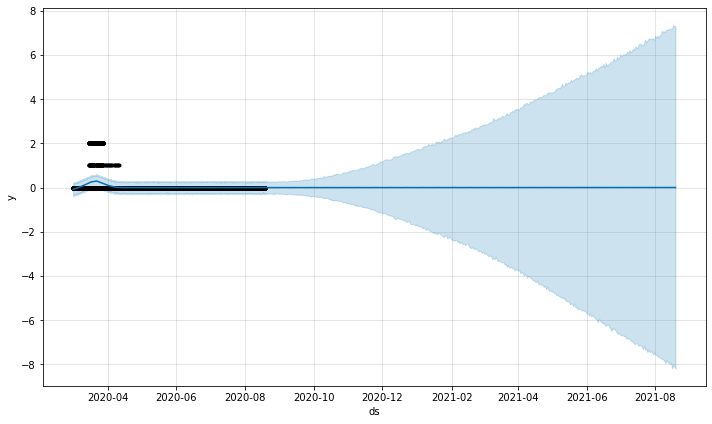

In [16]:
fig1 = prophet_model.plot(forecast)

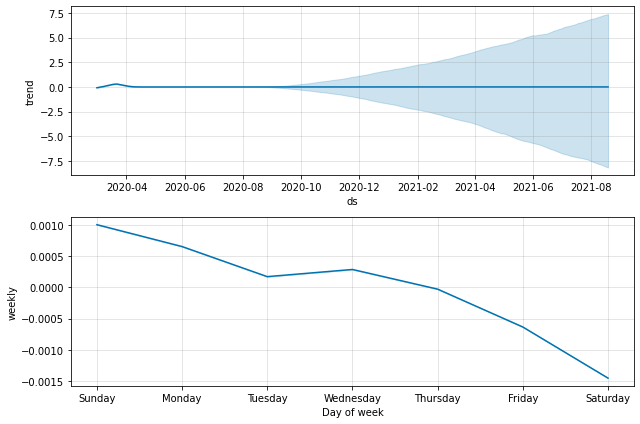

In [17]:
fig2 = prophet_model.plot_components(forecast)

In [18]:
plot_plotly(prophet_model, forecast)

In [19]:
plot_components_plotly(prophet_model, forecast)